In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

C:\Users\29644\AppData\Roaming\Python\Python36\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\29644\AppData\Roaming\Python\Python36\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\29644\AppData\Roaming\Python\Python36\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data=pd.read_csv("hw3.csv")

In [3]:
data.info()
#Through simple analysis, it can be seen that there are 2667 samples in total.
#The close column has 136 missing values
#There is no missing value in the volume column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667 entries, 0 to 2666
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ts         2667 non-null   object 
 1   open       2667 non-null   float64
 2   high       2163 non-null   float64
 3   low        2378 non-null   float64
 4   close      2531 non-null   float64
 5   volume     2667 non-null   float64
 6   volumeUSD  0 non-null      float64
 7   token      2667 non-null   object 
 8   chain      2667 non-null   object 
dtypes: float64(6), object(3)
memory usage: 187.6+ KB


In [4]:
# Delete the missing value of close
data=data[~np.isnan(data["close"])]

In [5]:
data['token'].value_counts()
#It can be seen that these data need to be cleaned

BTC                                   313
COMP                                  305
SOL                                   304
CRV                                   304
UNI                                   296
USDT                                  293
AAVE                                  291
ETH                                   283
<span name="tokenName">UNI</span>      30
<span name="tokenName">ETH</span>      25
<span name="tokenName">USDT</span>     19
<span name="tokenName">CRV</span>      17
<span name="tokenName">AAVE</span>     15
<span name="tokenName">BTC</span>      14
<span name="tokenName">SOL</span>      14
<span name="tokenName">COMP</span>      8
Name: token, dtype: int64

In [6]:
from pyquery import PyQuery as pq
#Remove HTML tags
data["token"]=data["token"].apply(lambda x:pq(x).text() )

In [10]:
data['token'].value_counts()

BTC     327
UNI     326
CRV     321
SOL     318
COMP    313
USDT    312
ETH     308
AAVE    306
Name: token, dtype: int64

In [11]:
#drop_duplicates
data = data.drop_duplicates()

In [12]:
data.shape

(2244, 9)

In [13]:
data['token'].value_counts()

BTC     286
CRV     283
SOL     282
UNI     281
ETH     280
COMP    280
USDT    276
AAVE    276
Name: token, dtype: int64

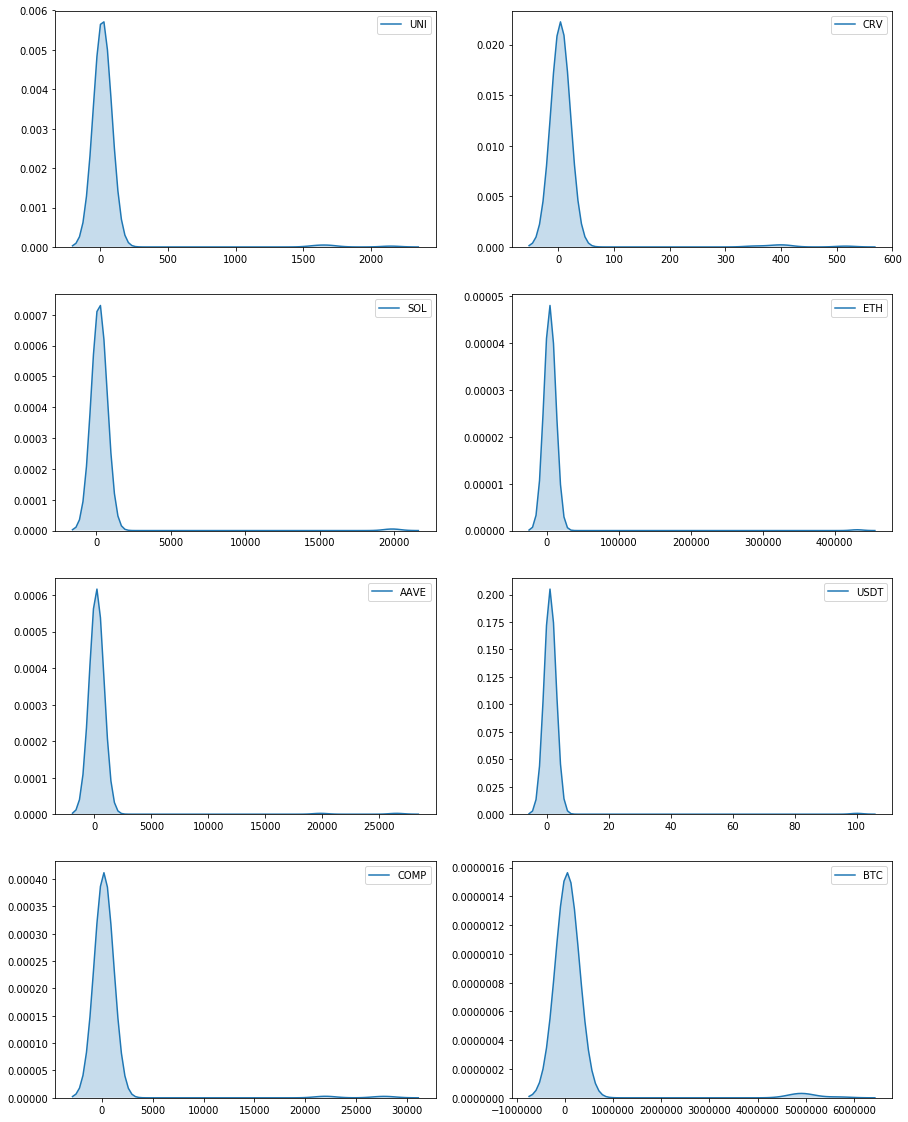

In [14]:
# Draw the positive distribution diagram of closing price according to each token
import math
tokens = data.token.unique()
fig, axes = plt.subplots(nrows=math.ceil(tokens.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens.size / 2)))
idx = 0
for label in tokens:
    sns.kdeplot(data[data["token"]==label]['close'].values,shade=True,ax=axes[idx // 2, idx % 2], label=label)    
    axes[idx // 2, idx % 2].legend()
    idx += 1

In [15]:
data['volumeUSD'] = data['close']*data['volume']

In [17]:
data.groupby(['token'])['volumeUSD'].sum().to_frame()

,volumeUSD
token,
AAVE,2.057396e+08
BTC,3.814655e+10
COMP,1.748055e+08
CRV,9.081863e+08
ETH,1.457979e+10
SOL,6.668510e+09
UNI,5.821828e+08
USDT,1.427199e+09
